**Project:** Bike Sharing Demand Prediction using Random Forest Regressor

**Model:** Random Forest Regressor

**Dataset:** UCI Bike Sharing

**Author:** Tasnima Jannat

**Date:** October, 2025

**Project Overview:** This project predicts bike rental demand using the UCI Bike Sharing Dataset.
I implemented a Random Forest Regressor with basic Exploratory Data Analysis (EDA), data preprocessing, hyperparameter tuning, and model evaluation.

**Objective:** Predicting how many bikes will be rented on a given day based on weather, season, working day and other conditions.

**Target Variable:** cnt (total bike rentals)

**Features:** instant, time of the day, season, year, month, hour, holiday, weekday, working day, weather situation, temperature, humidity, windspeed.


**Dataset Information:**
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

**Dataset Characteristics:** Multivariate     **Subject Area:** Social Science

**Associated Tasks:** Regression     **Feature Type:** Integer, Real

# Decision Tree and Random Forest Regressor

## **1. Decision Tree Regressor**
A **Decision Tree Regressor** is a machine learning model used to predict a number based on input data. It works by splitting the data into branches using simple yes or no questions, eventually reaching a value at the “leaf” of the tree. For example, it might predict bike rentals based on weather and time of day.

---

## **2. Decision Tree**
A **Decision Tree** in general is a flowchart-like model that can be used for **classification** (predicting categories) or **regression** (predicting numbers). It is easy to understand because it mimics human decision-making by asking sequential questions and following branches until it reaches an outcome.

- **Strengths:** Simple to visualize, handles non-linear relationships, and interpretable.  
- **Weaknesses:** Can overfit easily, sensitive to small changes in data, and may perform poorly on very complex datasets.
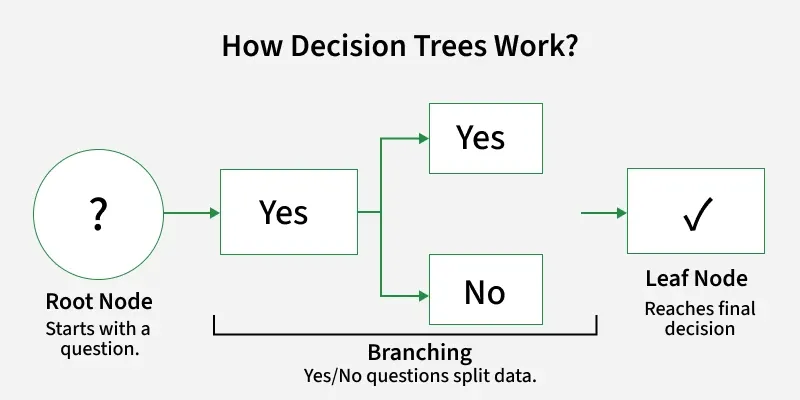

---

## **3. Random Forest Regressor**
A **Random Forest Regressor** is an ensemble of many decision trees. Each tree makes a prediction, and the forest averages them to produce a final result. This averaging makes predictions more accurate and less sensitive to noise.

- **When it performs best:**  
  - Large, complex datasets  
  - Non-linear relationships  
  - Noisy data  

- **Where it may struggle:**  
  - Small datasets (too many trees can overcomplicate)  
  - When interpretability is important (harder to visualize than a single tree)  
  - Real-time applications requiring very fast predictions  


In [36]:
# In this project, we are predicting how many bikes will be rented on a given day based on weather, season, working day and other conditions.

Import The Libraries

In [37]:
# These are the essential Python libraries for data handling, visualization, and machine learning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries from scikit-learn

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib # For saving model
import warnings
warnings.filterwarnings('ignore') # It tells pythons not to show any warning meessages and just to run the code quietly. I did it to keep the codebook clean.

Load The dataset

In [38]:
# The dataset comes from the UCI Machine Learning Repository.
# We'll import it from the ucimlrepo using python code.

In [39]:
pip install ucimlrepo

In [40]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=275)

# data (as pandas dataframes)
# Define Features and Target
# Features = all independent variables
# Target = dependent variable

X = df.data.features
y = df.data.targets

# metadata
print(df.metadata)

# variable information
print(df.variables)


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

In [41]:
# Here, target variable is in dataframe format. We'll transform them into series to later use it into pd.qcut for making bins.
if isinstance(y,pd.DataFrame):
  y = y.squeeze()
  print("Data shapes: ")
  print("X: ", X.shape)
  print("y: ", y.shape)

Data shapes: 
X:  (17379, 13)
y:  (17379,)


In [42]:
# Combine X and y into one dataframe for easy EDA
df = pd.concat([X, y.rename('cnt')], axis=1)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())


Dataset loaded successfully!
Shape: (17379, 14)

Columns: ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


#Basic Exploratory Data Analysis (EDA)

In [43]:
# Now we'll do some basic Exploratory Data Analysis (EDA) to get an idea about the dataset

In [44]:
# General Info
print("\nDATA INFO:")
print(df.info())


DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB
None


Missing Value Check

In [45]:
print("\nMISSING VALUES:")
print(df.isnull().sum())


MISSING VALUES:
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


Basic Statistics

In [46]:
print("\nSUMMARY STATISTICS:")
print(df.describe().T)


SUMMARY STATISTICS:
              count        mean         std   min      25%       50%  \
season      17379.0    2.501640    1.106918  1.00   2.0000    3.0000   
yr          17379.0    0.502561    0.500008  0.00   0.0000    1.0000   
mnth        17379.0    6.537775    3.438776  1.00   4.0000    7.0000   
hr          17379.0   11.546752    6.914405  0.00   6.0000   12.0000   
holiday     17379.0    0.028770    0.167165  0.00   0.0000    0.0000   
weekday     17379.0    3.003683    2.005771  0.00   1.0000    3.0000   
workingday  17379.0    0.682721    0.465431  0.00   0.0000    1.0000   
weathersit  17379.0    1.425283    0.639357  1.00   1.0000    1.0000   
temp        17379.0    0.496987    0.192556  0.02   0.3400    0.5000   
atemp       17379.0    0.475775    0.171850  0.00   0.3333    0.4848   
hum         17379.0    0.627229    0.192930  0.00   0.4800    0.6300   
windspeed   17379.0    0.190098    0.122340  0.00   0.1045    0.1940   
cnt         17379.0  189.463088  181.387599

In [52]:
# Quick Look at First Few Rows
print("\nSAMPLE DATA:")
print(df.head())


SAMPLE DATA:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


Target Variable distribution

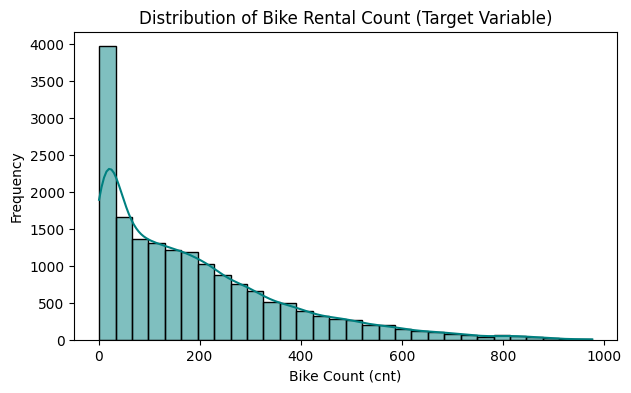

In [53]:
plt.figure(figsize=(7,4))
sns.histplot(df['cnt'], kde=True, bins=30, color='teal')
plt.title("Distribution of Bike Rental Count (Target Variable)")
plt.xlabel("Bike Count (cnt)")
plt.ylabel("Frequency")
plt.show()

**OBSERVATION:** Target variable is rightly skewed.


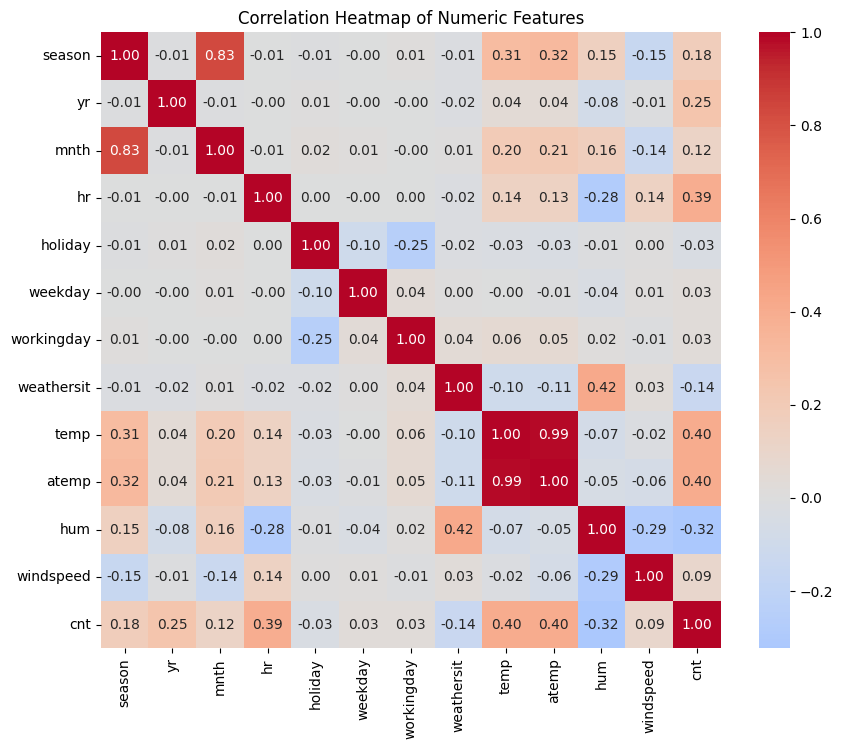

In [54]:
# Correlation heatmap of all numeric features
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix for all numeric features
corr = numeric_df.corr()

# Plot heatmap with annotated values and a clear color scale
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


**OBSERVATION:**


The heatmap shows correlation between all numeric features. For example, temperature (temp) has a correlation of 0.40 with bike count (cnt), indicating a moderately strong positive relationship. Humidity (hum) has a negative correlation (-0.32) with bike count (cnt).


Apart from humidity, holiday and weather situation, all other features have positive correlation with bike count (cnt). Temperature and hour of the day has larger positive correlation with bike count among all other features.


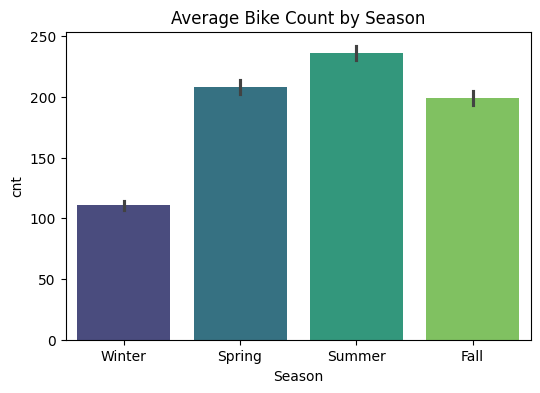

In [55]:
# Seasonal Trend Example (Average Count by Season)
plt.figure(figsize=(6,4))
sns.barplot(x='season', y='cnt', data=df, palette='viridis', estimator='mean')
plt.title("Average Bike Count by Season")
plt.xticks(ticks = [0,1,2,3], labels = ['Winter', 'Spring', 'Summer', 'Fall'])
plt.xlabel("Season")
plt.show()

**OBSERVATION**: Rentals increase in summer and lowest during winter.


#Basic Data Cleaning and Feature Preparation

In [56]:
# Drop leakage or irrelevant columns
df = df.drop(columns=["instant", "dteday", "casual", "registered"], errors='ignore')

Define target and features

In [57]:
target = "cnt"
X = df.drop(columns=[target])
y = df[target]

Feature Engineering

In [58]:
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print("Numeric features:", numeric_cols)
print("Categorical features:", categorical_cols)

Numeric features: ['hr', 'temp', 'atemp', 'hum', 'windspeed']
Categorical features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


# Train-Valid-Test-Split

Here I am using Stratified-binning technique to train-valid-test-split. It handles small, large, skewed, or imbalanced datasets. It can plug into any regression pipeline directly. My target variable is skewed as we saw in EDA. That's why I used this technique here.

In regression problem, the target variable is continuous. So, we cannot directly use stratify = y like in classification. To handle this, I created quantile bins of the target variables. This ensures that all subsets- train, validation, and test maintain a similar range and distribution of target variables.

In [59]:
# Create stratified bins using quantiles (10 bins here)
n_bins = 10
y_bins = pd.qcut(y, q=n_bins, duplicates='drop')

# Step 1: Split into Train + Temp (Validation+Test)

X_train, X_temp, y_train, y_temp, yb_train, yb_temp = train_test_split(
    X, y, y_bins,
    test_size=0.30,              # 70% train, 30% temp
    stratify=y_bins,
    random_state=42)

# Step 2: Split Temp into Validation + Test
# We'll now split the temporary set into 50/50 for validation and test
# Each 15% of total dataset (since 30% * 0.5 = 15%)

y_temp_binned = pd.qcut(y_temp, q=n_bins, duplicates='drop')

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp_binned,
    random_state=42)

In [60]:
# Print split summary
print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.2f}%)")
print(f"Validation set: {X_valid.shape[0]} samples ({X_valid.shape[0]/len(df)*100:.2f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.2f}%)")

Train set: 12165 samples (70.00%)
Validation set: 2607 samples (15.00%)
Test set: 2607 samples (15.00%)


In [61]:
# Check distribution similarity
print("\nDistribution check (Target mean per split):")
print(f"Train mean: {y_train.mean():.2f}")
print(f"Valid mean: {y_valid.mean():.2f}")
print(f"Test mean : {y_test.mean():.2f}")


Distribution check (Target mean per split):
Train mean: 189.75
Valid mean: 188.17
Test mean : 189.42


#Data preprocessing

The purpose of data preprocessing is to prepare raw data into a clean, structured, and machine-understandable format so that models can learn effectively and give reliable results. Though random forest regression doesnot need scaling, I kept it as a good practice. There is also no missing values in the dataset but I kept imputer as a good practice to use it into any other dataset.

For **Numeric features**, I used *Imputer (median)* to fill missing values and used *StandardScaler* to standardize numeric features to have mean 0 and standard deviation 1, keeping on same scale for better model performance.

For **Categorical features**, I used *Imputer ( most frequent)* to preserve the data integrity and used *One Hot Encoder* to convert categorical variables into machine-readable numbers.

In [62]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num', num_pipe, num_cols), ('cat', cat_pipe, cat_cols)])


#Model Pipeline

In [63]:
# Set a random seed for reproducibility

rf = RandomForestRegressor(random_state=42)

model = Pipeline([('preprocessor', preprocessor), ('rf', rf)])

#Hyperparameter Tuning
Hyperparameter are set before training a model to make the model perform better.
Hyperparameter tuning helps to optimize model complexity to avoid underfitting or overfitting. Here, I used *RandomizedSearchCV* to tune hyperparameter. It will randomly test different hyperparameter combinations on train and validation sets to find the best configuration. The test set is kept completely separate for final evaluation to avoid biased results.


In [64]:
# HYPERPARAMETER TUNING (RandomizedSearchCV)

param_grid = {'rf__n_estimators': [100, 200],    # number of decision trees to be built
    'rf__max_depth': [10, 20, None],             # number of splits in each decision tree
    'rf__min_samples_split': [2, 5],             # minimum number of samples to split an internal decision node
    'rf__min_samples_leaf': [1, 2],              # minimum number of samples in a leaf
    'rf__max_features': ['sqrt', 0.5]}           # number of features to consider when looking for the best split

# Perform random search with 3-fold cross-validation
search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=5,              # Number of random combinations. Keep small for speed
    scoring='r2',
    cv=3,                   # Cross validation folds
    random_state=42,
    n_jobs=-1,
    verbose = 1)

# Train the model
print("\nTraining and tuning model...")
search.fit(X_train, y_train)
best_model = search.best_estimator_
print("Best parameters:", search.best_params_)


Training and tuning model...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 0.5, 'rf__max_depth': None}


#Model Evaluation

MAE: average absolute prediction error

RMSE: penalizes large errors

R²: how much variance in target is explained by model

Cross_val_score: how well a machine learning model generalizes to unseen data

In cross validation, instead of training and testing once, the data is split into multiple folds and the model is trained and evaluated multiple times on different subsets.

In [68]:
# Make predictions on validation set
y_valid_pred = best_model.predict(X_valid)

# Calculate performance metrics
rf_r2_valid = r2_score(y_valid, y_valid_pred)
rf_mse_valid = mean_squared_error(y_valid, y_valid_pred)
rf_rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
rf_mae_valid = mean_absolute_error(y_valid, y_valid_pred)

print("\nRandom Forest Results (Validation set):")
print(f"R²:   {rf_r2_valid:.3f}")
print(f"MSE  (Mean Squared Error): {rf_mse_valid:.4f}")
print(f"RMSE: {rf_rmse_valid:.3f}")
print(f"MAE:  {rf_mae_valid:.3f}")


Random Forest Results (Validation set):
R²:   0.942
MSE  (Mean Squared Error): 1857.2719
RMSE: 43.096
MAE:  27.125


Residual Analysis on validation set

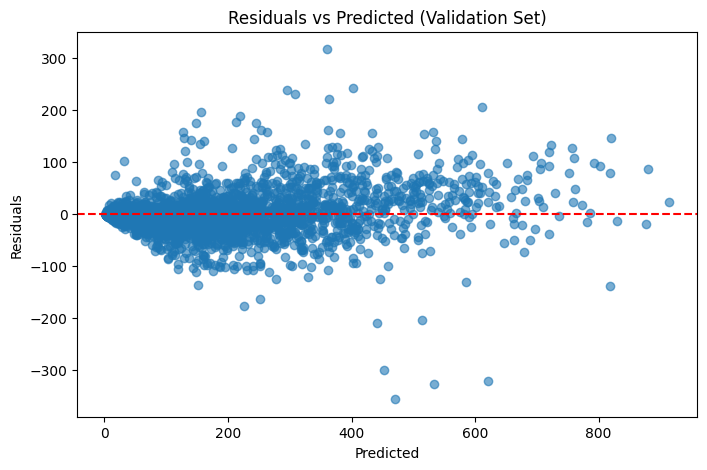

In [69]:
# Residual Plot (Validation Set)
residuals = y_valid - y_valid_pred
plt.figure(figsize=(8,5))
plt.scatter(y_valid_pred, residuals, alpha=0.6)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Validation Set)")
plt.show()

In [70]:
# Cross-validation on Training Data
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
cv_r2 = cv_scores
print("\nCross-validation R squared Scores:", np.round(cv_r2, 3))
print("Mean CV R2:", np.mean(cv_r2).round(3))



Cross-validation R squared Scores: [0.939 0.93  0.928 0.937 0.939]
Mean CV R2: 0.934


In [71]:
# Final Evaluation on Test Set
y_test_pred = best_model.predict(X_test)

rf_r2_test = r2_score(y_test, y_test_pred)
rf_mse_test = mean_squared_error(y_test, y_test_pred)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nRandom Forest Results (Test set):")
print(f"R²:   {rf_r2_test:.3f}")
print(f"MSE  (Mean Squared Error): {rf_mse_test:.4f}")
print(f"RMSE: {rf_rmse_test:.3f}")
print(f"MAE:  {rf_mae_test:.3f}")


Random Forest Results (Test set):
R²:   0.939
MSE  (Mean Squared Error): 1985.8605
RMSE: 44.563
MAE:  28.402


**Interpretation:**

R2 : The model explains 93.9% of the variance in bike rental demand.

RMSE: The typical prediction error is approximately 44 bikes, with larger errors being more heavily penalized.

MAE: On average, the model's predictions are off by about 28 bikes from the actual rental count.  

**Residual Analysis on test set**

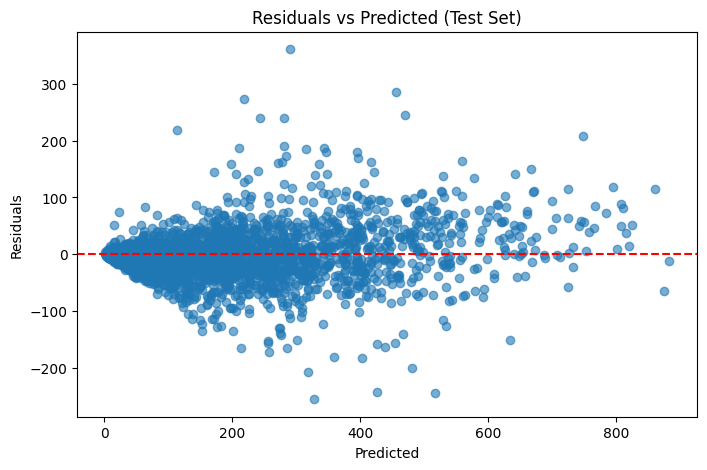

In [72]:
# Residual Plot (Test Set)
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals_test, alpha=0.6)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Test Set)")
plt.show()


**Observation:** The plot depicts my random forest regressor model is doing well overall. Predictions are centered properly and residuals are random for most of the range. However, it is less accurate at the high demand end where predicted values are large. This means that for very busy days, the model tends to underestimate the number of rentals.

The fan shape indicates that error variance increases with predicted value, a sign of heteroscedasticity. It is common in real world regression cases.
To mitigate this further, we can try transforming the target to log to reduce skewness and also can try adding interactive features such as temperature  with season etc.

**Persistence Model:** It is simply a reference model used to compare performance of more complex algorithms.
Here, I used this baseline model using mean of the target. If the train model cannot outperform the baseline model, it means that the model is not learning useful patterns yet.

In [73]:
# PERSISTENCE (BASELINE) MODEL (mean predictor)

base = DummyRegressor(strategy='mean')
base.fit(X_train, y_train)
y_base = base.predict(X_test)
base_r2 = r2_score(y_test, y_base)

print("\nBaseline R²:", base_r2)


Baseline R²: -3.2847506725719455e-06


**Observation:** The R-squared value of my trained model is far better than this baseline model. So, my regressor model could outperform the persistence model.

In [74]:
# SAVE MODEL

joblib.dump(best_model, "random_forest_regression_model.pkl")
print("\nModel saved as random_forest_regression_model.pkl")

# Saving model allows us to load it later for predictions on new data without retraining.


Model saved as random_forest_regression_model.pkl


#Feature Importance
It shows how much input variable contributes to the model's prediction. In random forest regressor model, feature importance measures how much each feature helps the model reduce prediction error across all decision trees.


Top 10 Important Features:
            Feature  Importance
3           num__hr    0.527264
9        num__atemp    0.097472
8         num__temp    0.080681
1           num__yr    0.075565
10         num__hum    0.051593
6   num__workingday    0.051204
5      num__weekday    0.031914
0       num__season    0.023036
2         num__mnth    0.021682
11   num__windspeed    0.019191


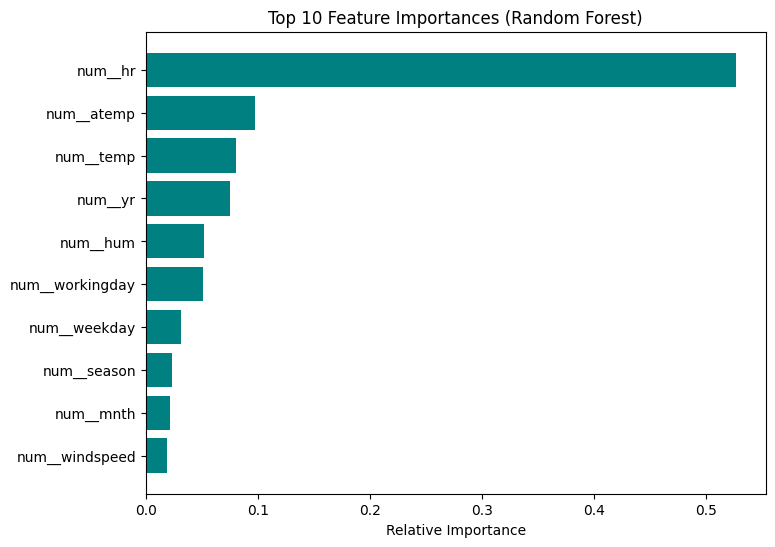

In [75]:
# FEATURE IMPORTANCE (after the model training)

# Extract the trained Random Forest model from the pipeline.
rf_model = best_model.named_steps['rf']

# Get feature names after preprocessing
# ColumnTransformer expands categorical variables, so we need this.
preprocessor = best_model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# Get importance scores
importances = rf_model.feature_importances_

# Combine into a DataFrame for easy viewing
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feat_imp.head(10))

# Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10], color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Relative Importance")
plt.show()

# Feature importance helps explain which variables contribute most to the model's predictions that adds interpretability.

**Observation:** We can see that hour of the day has higher feature importance, which means it plays a larger role in predicting the target.

In [76]:
print("\n Random Forest Regression project completed successfully!")


 Random Forest Regression project completed successfully!


**Key Insights**

*   The Random Forest Regressor achieved a strong R² score, showing its capability to generalize well.


*   Residual analysis validated that model errors were stable and unbiased.


*   Stratified splitting ensured consistent target representation, reducing data leakage and performance bias.


**Conclusion**

This project demonstrates a complete machine learning workflow — from preprocessing and stratified sampling to hyperparameter optimization and rigorous evaluation.
The model stands as a robust and interpretable predictive system, suitable for real-world deployment and future model stacking or ensemble approaches.

Now, we are going to use a neural network model on the same dataset and compare it with Random Forest Regressor Model that we already have built.



To ensure fair comparison with Random Forest, we reuse:



Same features



Same target variable



Same stratified binning



Same splits


Same evaluation metrics




That means the steps upto data preprocessing are same for both models. This ensures any performance difference is due to the model, not data handling.



Let's build a neural network model on this UCI Bike Sharing Dataset and compare which of the two models performs better and why it does so.

#**Neural Network Model**


**What Is a Neural Network?**




A neural network is a machine learning model inspired by how the human brain processes information. Instead of following fixed rules, it learns patterns by observing data and adjusting itself over time.
At its core, a neural network takes in information as inputs, processes it through interconnected decision units (neurons), and produces an output based on learned relationships.



In simplee terms, a neural network learns by example, improving its predictions each time it sees data.



**How Does a Neural Network Work?**



A neural network works in layers:



**Input Layer:** Receives raw information such as weather, time, and season.



**Hidden Layers:** These layers transform input information into meaningful patterns by combining signals in different ways.



**Output Layer:** Produces the final prediction—in this case, expected bike demand.
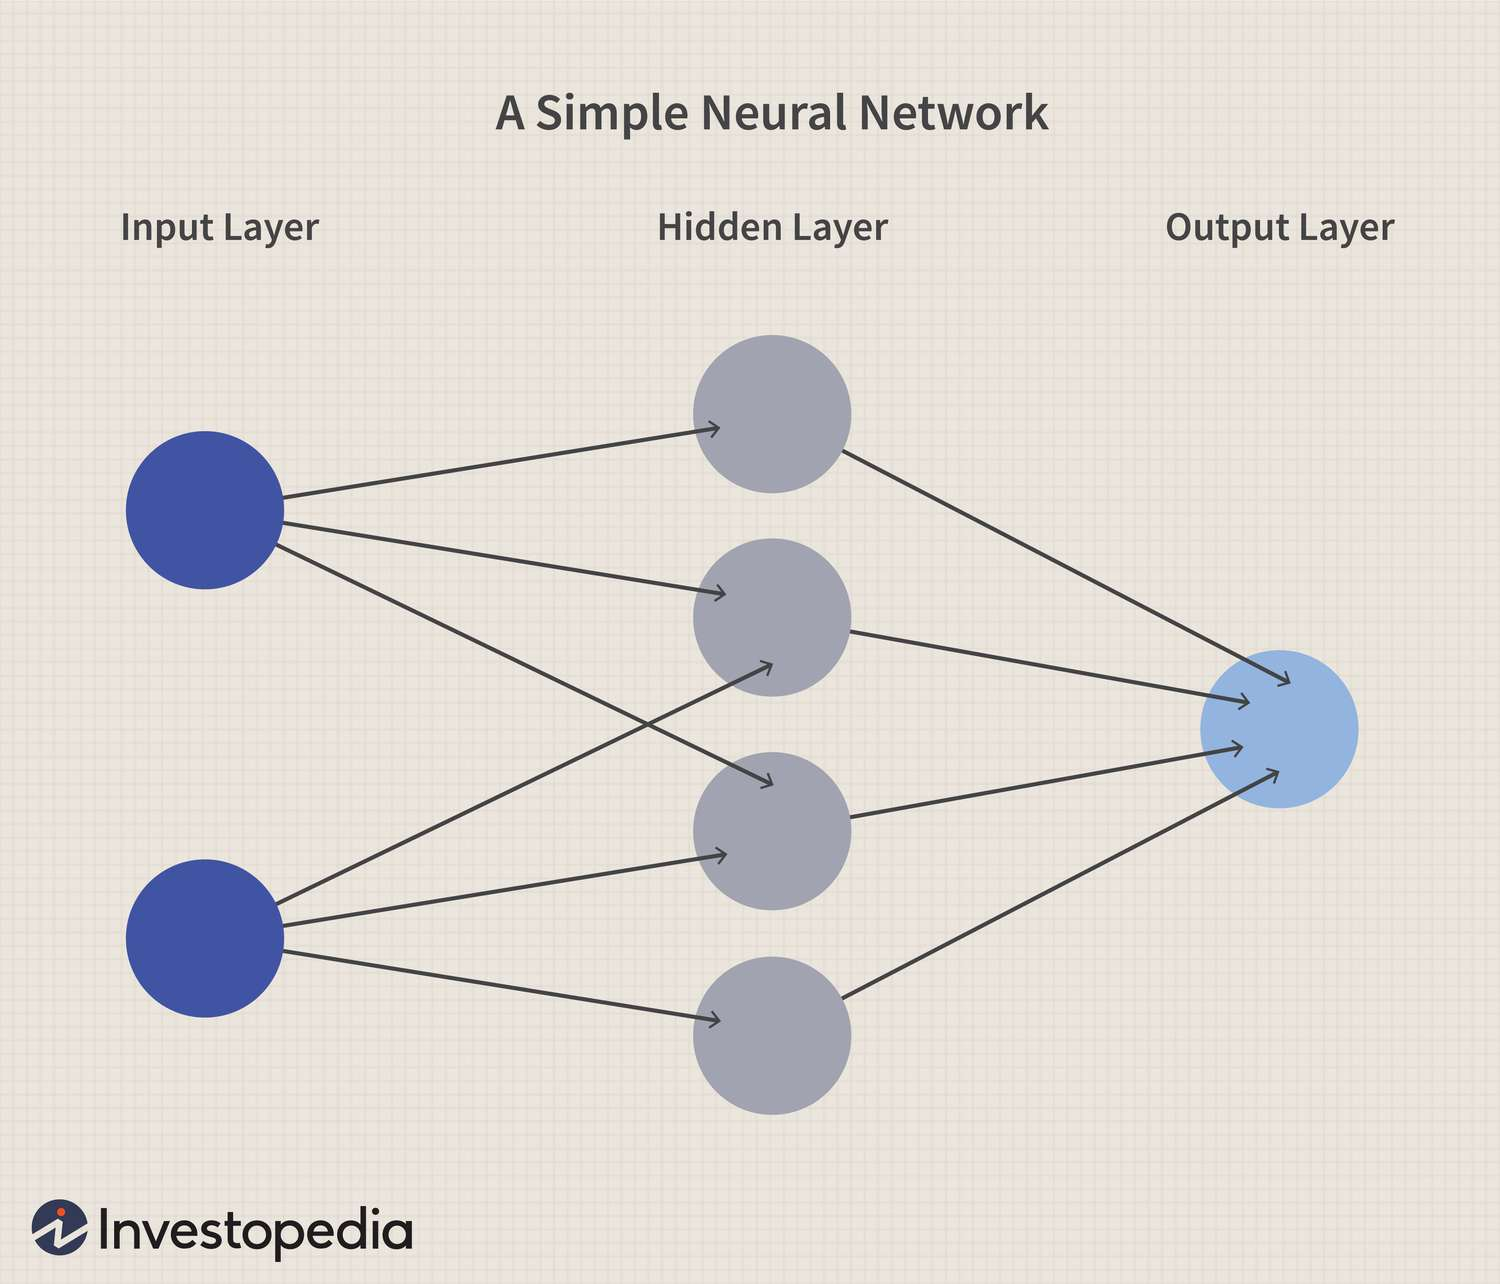



During training:


*   The model makes a prediction

*   Measures how wrong it was

*   Adjusts itself to reduce future mistakes



It is like learning to throw darts. Each throw gives us feedback, and we adjust our aim.


**Types of Neural Network Models**



Neural networks come in different forms, each designed to solve specific types of problems based on the structure of the data.



**Feed-Forward Neural Network (FNN):** The simplest type of neural network where information flows in one direction from input to output. Commonly used for regression and classification on structured data.



**Convolutional Neural Network (CNN):** Designed for image and spatial data. These networks automatically learn visual features such as edges and shapes.



**Recurrent Neural Network (RNN):** Specialized for sequential data where past information matters, such as time series or text.



**Long Short-Term Memory (LSTM) / Gated Recurrent Unit (GRU):** Advanced forms of RNNs that handle long-term dependencies more effectively, often used in forecasting and language tasks.


**Autoencoders:** Used for data compression, feature learning, and anomaly detection by learning efficient representations of data.



**Generative Adversarial Networks (GANs):** Used for generating new data, such as images or synthetic samples, through a competition between two networks.


Different neural network architectures are designed for different data structures, and choosing the right one is crucial for effective modeling.


For our dataset, we are going to use Feed-Forward Neural Network (FNN) since our dataset has tabular features. Since our dataset has no spatial data, images, or sequential dependency, other types of neural network model is not needed.

#**Feed-Forward Neural Network**


**What Is a Feed-Forward Neural Network (FNN)?**


A Feed-Forward Neural Network (FNN) is the simplest and most widely used type of neural network.



**Why it is called “feed-forward”**



Information flows in one direction only



From input → hidden layers → output



No feedback loops or memory


Each prediction is made independently, based solely on the input features.

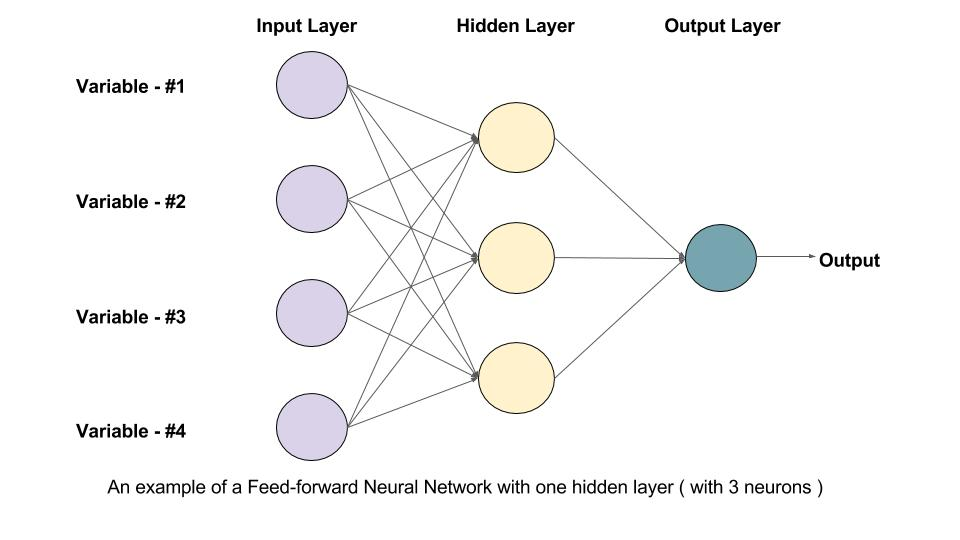


**Why Use an FNN for This Problem?**



The bike-sharing problem involves predicting a continuous number based on structured inputs like: temperature, humidity, time of day, and season.



An FNN is well suited because:

*   It handles numerical, tabular data

*   It captures non-linear relationships

*   It is flexible and widely accepted in regression tasks



An FNN offers a balance between model power and interpretability.


**Where Does an FNN Perform Well?**


Feed-Forward Neural Networks perform best when:

*   The dataset is large enough

*   Relationships are smooth and nonlinear

*   Features are properly scaled

*   Patterns are continuous rather than rule-based


**Where Does an FNN Struggle?**


FNNs may underperform when:

*   The dataset is small or medium-sized

*   Data contains sharp thresholds or rule-based logic

*   Feature interactions are highly conditional



In such cases, tree-based models (like Random Forest) often perform better.



More complex models are not always better models.



**Why Use a Neural Network in This Project?**


**Objective**



This neural network was implemented to:

*   Explore a fundamentally different modeling approach

*   Benchmark performance against Random Forest

*   Understand strengths and limitations of deep learning on structured data





**Step 1: Preparing the Environment**



Before building any predictive system, we need the right analytical tools. Just like a craftsman prepares tools before work, a data scientist sets up libraries that handle data, mathematics, and machine learning.



This step ensures that we can:



Read and manipulate data



Build a neural network



Measure how well our model performs


In [77]:
#Import the libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

**Step 2: Keeping the Data Split Consistent**


We previously built a Random Forest model using a carefully designed train-validation-test split. To make a fair comparison, the neural network must see exactly the same data structure.



Training data → teaches the model



Validation data → checks learning quality



Test data → simulates real-world performance


**Step 3: Scaling the Data (Teaching the Model Fairness)**



Neural networks learn through mathematical optimization. If one feature (like temperature) has large numbers and another (like humidity) has small numbers, the model becomes biased toward larger values.



Scaling:



Puts all features on equal footing


Helps the model learn faster and more accurately


Prevents one variable from dominating learning


In [78]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

**Step 4: Designing the Feed-Forward Neural Network Architecture**



A neural network is a system of connected decision units (neurons). The architecture defines how complex the model is and how it processes information.


We used two hidden layers here. It is good to go for non-linear capacity.


**Step 5: Choosing Activation Functions**


Activation functions decide how neurons respond to incoming information. Without them, a neural network would behave like a simple linear equation.



ReLU activation allows the model to learn complex, nonlinear relationships.
It improves learning speed and stability.



Activation functions act like decision switches that determine which signals matter.





**Step 6: Adding Regularization (Preventing Overconfidence)**



Neural networks can become too confident, memorizing training data instead of learning general patterns. Regularization introduces discipline.



L2 regularization discourages extreme weight values.



Dropout forces the network to rely on multiple signals.



The model learns to generalize, not memorize.


In [80]:
model = Sequential([
    Dense(64, activation='relu',
          kernel_regularizer=l2(0.001),
          input_shape=(X_train_scaled.shape[1],)),

    Dropout(0.2),

    Dense(32, activation='relu',
          kernel_regularizer=l2(0.001)),

    Dense(1, activation='linear')
])


**Step 7: Defining the Loss Function**



The loss function tells the model how wrong it is. Without it, the model would have no direction for improvement.


We used **MSE** as our loss function since:

*   The target variable is continuous

*   Large prediction errors are more costly than small ones

*   We want the model to strongly penalize large mistakes.


MSE teaches the model to avoid large prediction mistakes, which is crucial for demand forecasting. That's why we used MSE as loss function in our case.



Mean Squared Error penalizes large mistakes heavily and encourages accurate predictions across all demand levels.


The loss function is the scorecard the model tries to improve every time it learns.



**Step 8: Selecting the Optimizer**



The optimizer controls how the model learns, similar to how a teacher adjusts lesson pace.


In our case, we used **ADAM** as optimizer.


**ADAM = Adaptive Moment Estimation**


It combines the strength of **momentum-based learning** (remembers past updates) and **adaptive learning rates** (adjusts step size automatically).


So, behind the scene, Adam:

*   Looks at past gradients to determine direction

*   Adjusts learning rate for each parameter

*   Moves faster in stable directions

*   Slows down in noisy directions



Adam is like a smart GPS that adapts speed and direction based on road conditions.



A good optimizer helps the model learn faster without overshooting.


In [81]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse'),
        tf.keras.metrics.MeanAbsoluteError(name='mae')
    ]
)


**Step 9: Training with Validation Monitoring**


Training indefinitely can cause overfitting. Validation monitoring helps decide when to stop learning.



Training data teaches and validation data evaluates.



Early stopping prevents performance degradation.


In [82]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [83]:
#Train the FNN model
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/200
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 59753.8398 - mae: 170.0310 - rmse: 243.6583 - val_loss: 20208.6621 - val_mae: 102.4983 - val_rmse: 142.1562
Epoch 2/200
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 20383.9102 - mae: 103.2384 - rmse: 142.7210 - val_loss: 19643.9746 - val_mae: 102.2781 - val_rmse: 140.1560
Epoch 3/200
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20152.5098 - mae: 102.4394 - rmse: 141.9440 - val_loss: 19471.6504 - val_mae: 102.0748 - val_rmse: 139.5399
Epoch 4/200
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20140.0312 - mae: 103.8242 - rmse: 141.9032 - val_loss: 19361.0527 - val_mae: 102.9488 - val_rmse: 139.1430
Epoch 5/200
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20075.0879 - mae: 103.6795 - rmse: 141.6717 - val_loss: 19259.5332 - val_mae: 102.0812 - val_rmse: 138.7778
Epoch 6/200
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20320.6465 - mae: 104.0357 - rmse: 142.5233 - val_loss: 19198.1152 - val_mae: 101.6426 - val_r

**Step 10: Evaluating Model Performance**


A model is only useful if we can measure how well it predicts real outcomes.


**R²** shows how much variation the model explains.


**RMSE** shows average prediction error.


**MAE** shows typical deviation.


In [84]:
y_valid_pred = model.predict(X_valid_scaled).ravel()

r2_valid = r2_score(y_valid, y_valid_pred)
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
mae_valid = mean_absolute_error(y_valid, y_valid_pred)

print(f"Validation R²: {r2_valid:.4f}")
print(f"Validation RMSE: {rmse_valid:.4f}")
print(f"Validation MAE: {mae_valid:.4f}")


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation R²: 0.9254
Validation RMSE: 48.9818
Validation MAE: 32.8911


**Step 12: Final Test Evaluation**



The test set represents future, unseen data. It answers the most important question:


"Will this model work in the real world?"



The model is evaluated only once on test data.


Results reflect true generalization capability.


In [86]:
y_test_pred = model.predict(X_test_scaled).ravel()

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test R²: 0.9171
Test RMSE: 52.0250
Test MAE: 34.7479


#**FNN Evaluation Metrics Interpretation and Comparison with Random Forest Regressor**


**R² (Coefficient of Determination)**


Random Forest explains 93.9% of the variation in bike demand whereas
FNN explains 91.71%


**Interpretation:**


Both models are very strong, but Random Forest captures more of the demand-driving patterns.


**RMSE (Root Mean Squared Error)**


RMSE for Random Forest is 44.56 and for FNN is 52.03


RF predictions deviate from actual demand by ~45 bikes


FNN errors are ~52 bikes


**Interpretation:**
The neural network makes larger mistakes on average, especially on high-demand days.


**MAE (Mean Absolute Error)**


MAE for Random Forest is 28.40 and for FNN is 34.75


RF is typically off by 28 bikes


FNN is typically off by 35 bikes


**Interpretation:**


Day-to-day predictions from RF are more consistently accurate.


**What the Comparison Tells Us**

*   Both models perform exceptionally well

*   Random Forest is clearly superior across all metrics

*   Neural Network is competitive but less precise



The difference is not marginal, it is systematic.
This means the performance gap is due to model suitability, not random chance.


**Why Random Forest Outperformed the Neural Network**

This outcome is expected and well-documented in ML literature for structured tabular data.


**Reason 1: Nature of the Dataset (Tabular & Rule-Based)**


The Bike Sharing dataset contains discrete time features (hour, day, season), threshold effects (weather conditions), and nonlinear but rule-like patterns.


Random Forest excels at capturing if-then splits, learning sharp thresholds, and modeling interactions automatically.
Neural networks struggle with this unless extremely tuned.


**Reason 2: Random Forest Handles Feature Interactions Natively**


Random Forest automatically models feature combinations, no scaling or normalization assumptions, and each tree learns different perspectives.
FNN must learn interactions numerically, sensitive to architecture choices, and requires much larger data to dominate.


**Reason 3: Neural Networks Are Data-Hungry**


Our dataset is medium-sized.
Neural networks shine with large-scale data and need extensive tuning to outperform tree ensembles.


**Reason 4: Error Sensitivity**


Higher RMSE for FNN means larger errors on peak-demand days and less robustness to extreme values.
Random Forest handles outliers better.



**Did the Neural Network Fail?**


Absolutely not.


What the FNN results actually show:


91.71% R² is excellent.

The model generalizes well.

The training procedure was correct.

Scaling and regularization worked.


The neural network is competent, stable, but not optimal for this data structure.


**Step 12: Residual Analysis (Understanding Mistakes)**


Even good models make mistakes. Residual analysis shows how and where errors occur.



Random scatter → good model


Patterns → missing information or bias


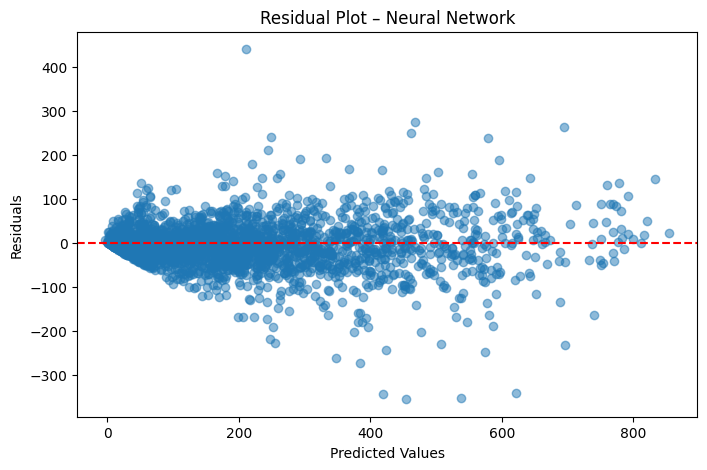

In [87]:
import matplotlib.pyplot as plt

residuals = y_test - y_test_pred

plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot – Neural Network")
plt.show()


**What our FNN Residual Plot Shows**

**Observation 1: Residuals are centered around zero**



The dashed red line (zero) sits roughly at the center and no systematic upward or downward shift. It means the neural network is not consistently overpredicting or underpredicting.


**Observation 2: Funnel-shaped spread (Heteroscedasticity)**


At low predicted values → residuals are tightly clustered


At high predicted values → residuals spread widely (±300-400)



It means the neural network struggles to maintain accuracy when demand is high.
This aligns directly with our higher RMSE.


**Observation 3: Large extreme errors at high demand**


Several large positive and negative residuals especially visible beyond ~400 predicted bikes.



It means the model occasionally makes very large mistakes, particularly on peak-demand days.


This is why:


RMSE is significantly higher


MAE is also worse than Random Forest


**Observation 4: No strong curvature pattern**


No U-shape or wave pattern


Indicates no major missing nonlinear structure



It means the neural network did learn the core relationship, but not robustly.


**What This Explains About FNN vs Random Forest**


This residual plot visually confirms our metric comparison.


Why FNN performed a bit worse:

*   Wide residual spread

*   Neural network less robust at extremes

*   Large outliers

*   Sensitive to rare high-demand patterns

*   Heteroscedasticity

*   Cannot adapt to varying variance



Random Forest, by contrast:

*   Handles thresholds better

*   Averages many trees → stabilizes extremes

*   Naturally models conditional variance



The neural network learned the “average” behavior well but failed to consistently handle peak-demand complexity.


**Key Takeaway from the Residual Plot**


The residual plot of the feed-forward neural network shows residuals centered around zero, indicating no systematic prediction bias. However, the increasing spread of residuals at higher predicted values reveals heteroscedasticity, suggesting reduced predictive reliability during high-demand periods. The presence of several large residuals further explains the higher RMSE and MAE observed for the neural network compared to the Random Forest model. Overall, while the neural network captures the general demand pattern, it is less robust in handling extreme demand fluctuations.



The neural network predicts average bike demand well but struggles with extreme demand scenarios, leading to larger and more variable errors.


#**Conclusion and Model Comparison**


In this project, two fundamentally different machine learning approaches, Random Forest Regressor and Feed-Forward Neural Network (FNN), were applied to predict bike demand using the UCI Bike Sharing dataset. Both models demonstrated strong predictive capability, indicating that the dataset contains clear and learnable demand patterns.


The Random Forest model consistently outperformed the neural network across all evaluation metrics, achieving higher explanatory power and lower prediction errors. This result highlights the strength of tree-based ensemble methods in handling structured, tabular data with nonlinear interactions and threshold-based behavior.


The neural network, while slightly less accurate, performed competitively and successfully captured the overall demand trends. Its performance confirms that neural networks can model complex relationships but also underscores that greater model complexity does not always translate into superior performance for every data type.


Overall, this comparative analysis reinforces a key data science principle: **model selection should be driven by data characteristics rather than model sophistication**. For this problem, Random Forest emerges as the more suitable choice, while the neural network serves as a valuable benchmark and learning exercise in deep learning applications.
